# GRIP @ The Sparks Foundation
## Task 4 : Exploratory Data Analysis - Terrorism
## Author : Anweasha Saha

### Problem Statement
- Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’.
- As a security/defense analyst, try to find out the hot zone of terrorism.
- What all security issues and insights you can derive by EDA?
- You can choose any of the tool of your choice (Python/R/Tableau/PowerBI/Excel/SAP/SAS).

In [6]:
# Importing the required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
!pip install openpyxl

### Step 1 - Loading the dataset

In [10]:
df=pd.read_csv (r"C:\Users\DR. DEBASISH SAHA\Downloads\globalterrorismdb.csv",low_memory=False, encoding='latin1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Step 2- Data Cleaning

In [13]:
# renaming the columns
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':
                  'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                  'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                   'targtype1_txt':'TargetType','weaptype1_txt':'Weapon_type','motive':'Motive',
                  'extended':'Extended'},inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [18]:
missing_values_count = df.isnull().sum()
print (missing_values_count)

eventid            0
Year               0
Month              0
Day                0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64


In [19]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

56.481718962414206


In [20]:
# removing all the rows that contain a missing value
df.dropna()

,eventid,Year,Month,Day,approxdate,Extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related


In [21]:
# removing all columns with at least one missing value
columns_with_na_dropped = df.dropna(axis=1)
columns_with_na_dropped.head()

,eventid,Year,Month,Day,Extended,country,Country,region,Region,vicinity,...,Group,individual,weaptype1,Weapon_type,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1.970000e+11,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,...,MANO-D,0,13,Unknown,0,PGIS,0,0,0,0
1,1.970000e+11,1970,0,0,0,130,Mexico,1,North America,0,...,23rd of September Communist League,0,13,Unknown,0,PGIS,0,1,1,1
2,1.970010e+11,1970,1,0,0,160,Philippines,5,Southeast Asia,0,...,Unknown,0,13,Unknown,0,PGIS,-9,-9,1,1
3,1.970010e+11,1970,1,0,0,78,Greece,8,Western Europe,0,...,Unknown,0,6,Explosives,1,PGIS,-9,-9,1,1
4,1.970010e+11,1970,1,0,0,101,Japan,4,East Asia,0,...,Unknown,0,8,Incendiary,1,PGIS,-9,-9,1,1


In [22]:
# how much data did we lose?
print("Columns in original dataset: %d \n" % df.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 135 

Columns with na's dropped: 29


In [23]:
df=df[['Year','Month','Day','Country','State','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','TargetType','Weapon_type','Motive']]
df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)

In [24]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
State             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed              0
Wounded             0
Target            636
Summary         66129
Group               0
TargetType          0
Weapon_type         0
Motive         131130
dtype: int64

### Data Insights

In [25]:
print('Country with the most attacks:',df['Country'].value_counts().idxmax())
print('City with the most attacks:',df['city'].value_counts().index[1])

Country with the most attacks: Iraq
City with the most attacks: Baghdad


In [27]:
print('Region with the most attacks:',df['Region'].value_counts().idxmax())

Region with the most attacks: Middle East & North Africa


C:\Users\DR. DEBASISH SAHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


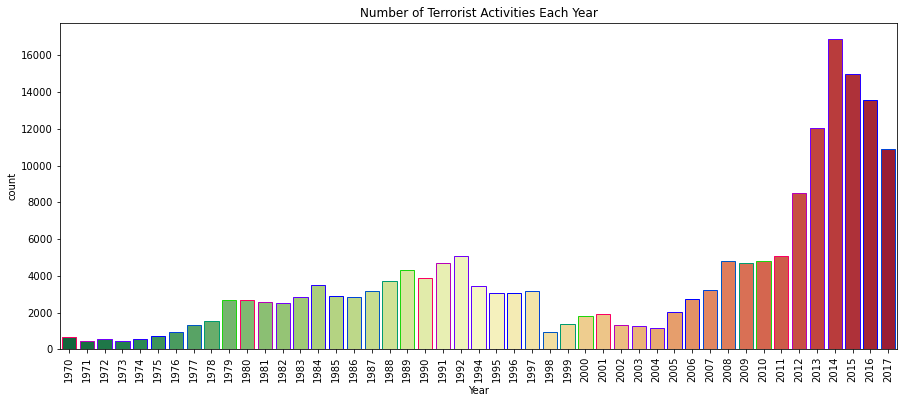

In [28]:
# terrorist Activities each year
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('prism',10))
plt.xticks(rotation=90)
plt.title('Number of Terrorist Activities Each Year')
plt.show()

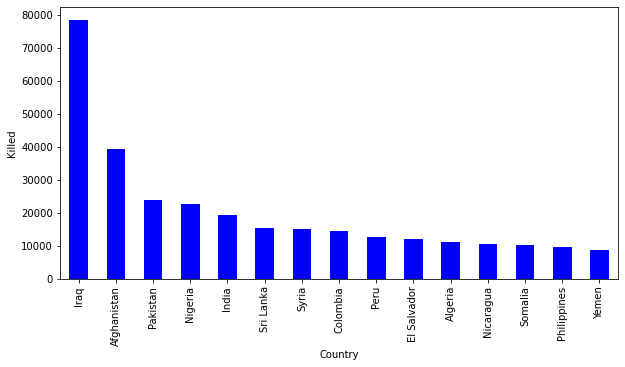

In [29]:
plt.figure(figsize = (10,5))
df.groupby(['Country'])['Killed'].sum().sort_values(ascending = False).head(15).plot(kind = 'bar', color = 'blue')

plt.xticks(rotation=90)
plt.ylabel("Killed")
plt.show()

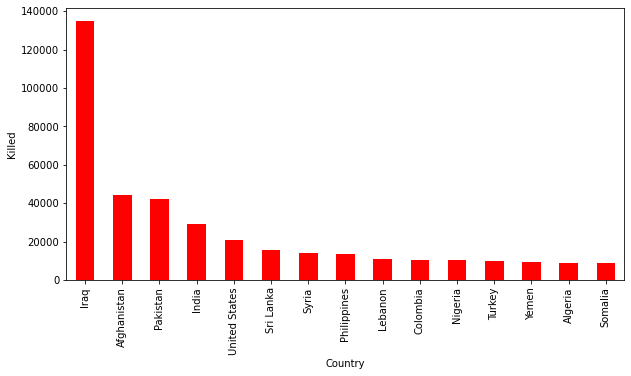

In [30]:
plt.figure(figsize = (10,5))
df.groupby(['Country'])['Wounded'].sum().sort_values(ascending = False).head(15).plot(kind = 'bar', color = 'red')

plt.xticks(rotation=90)
plt.ylabel("Killed")
plt.show()

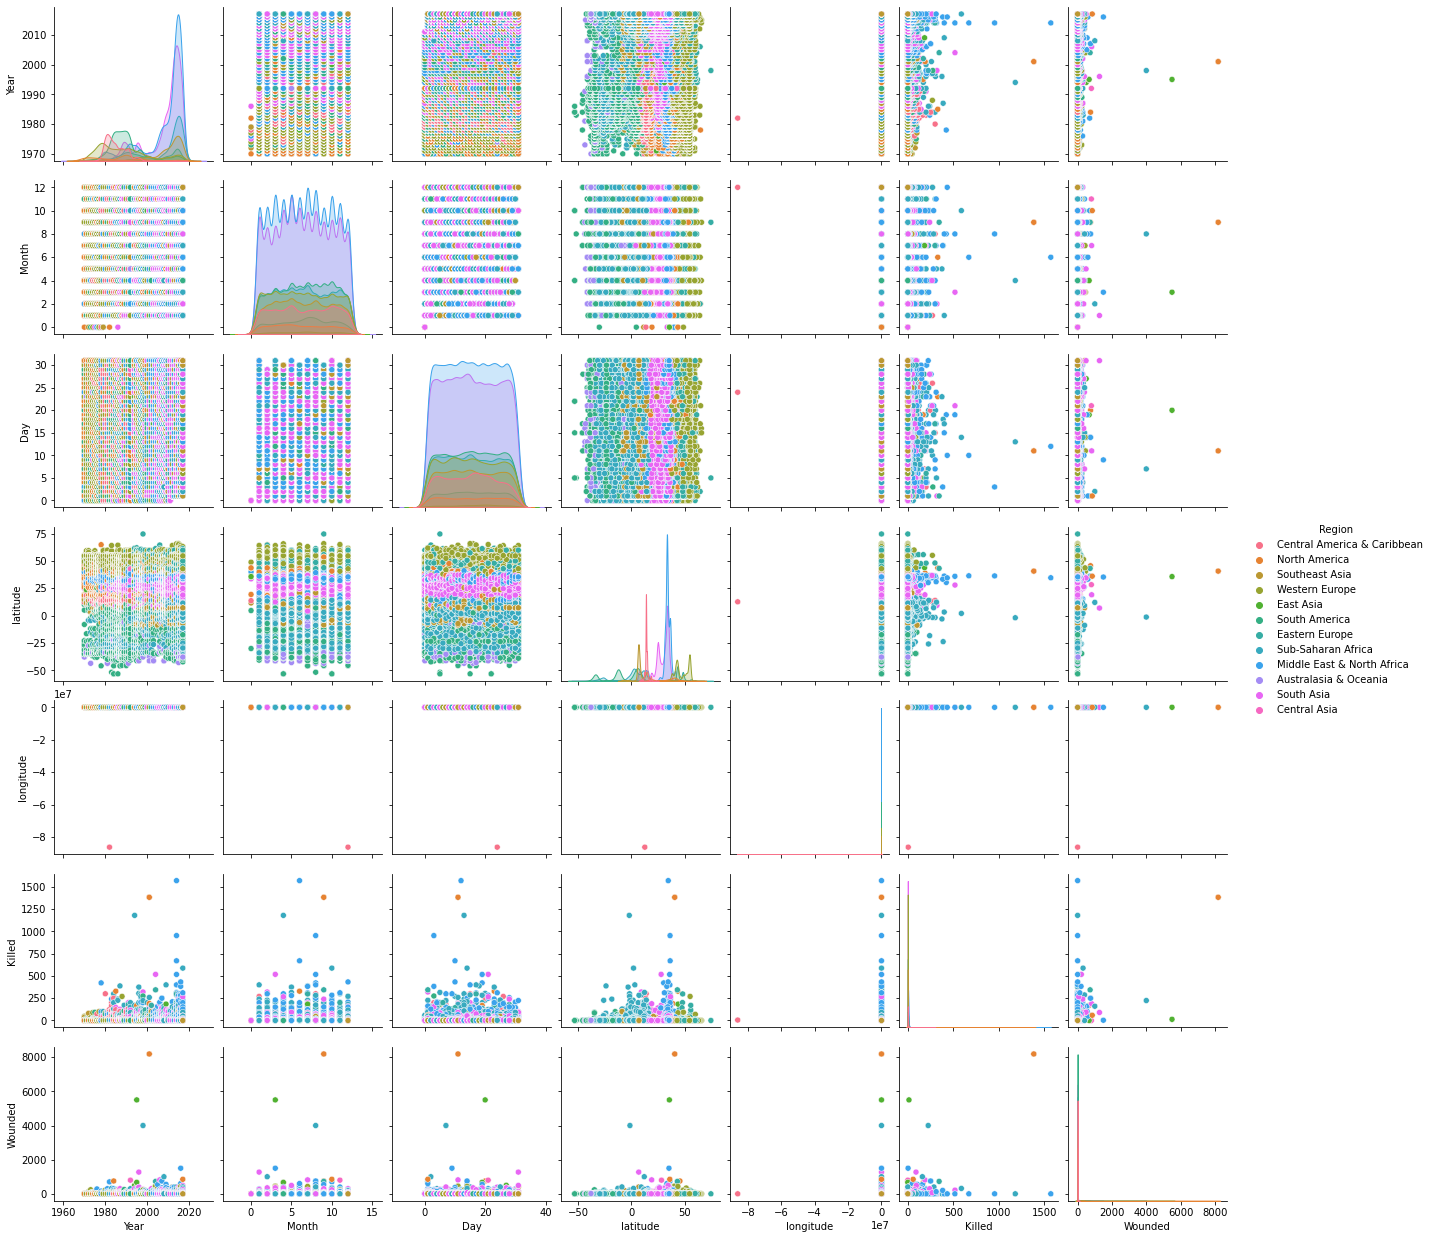

In [32]:
sns.pairplot(df,hue='Region')

C:\Users\DR. DEBASISH SAHA\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


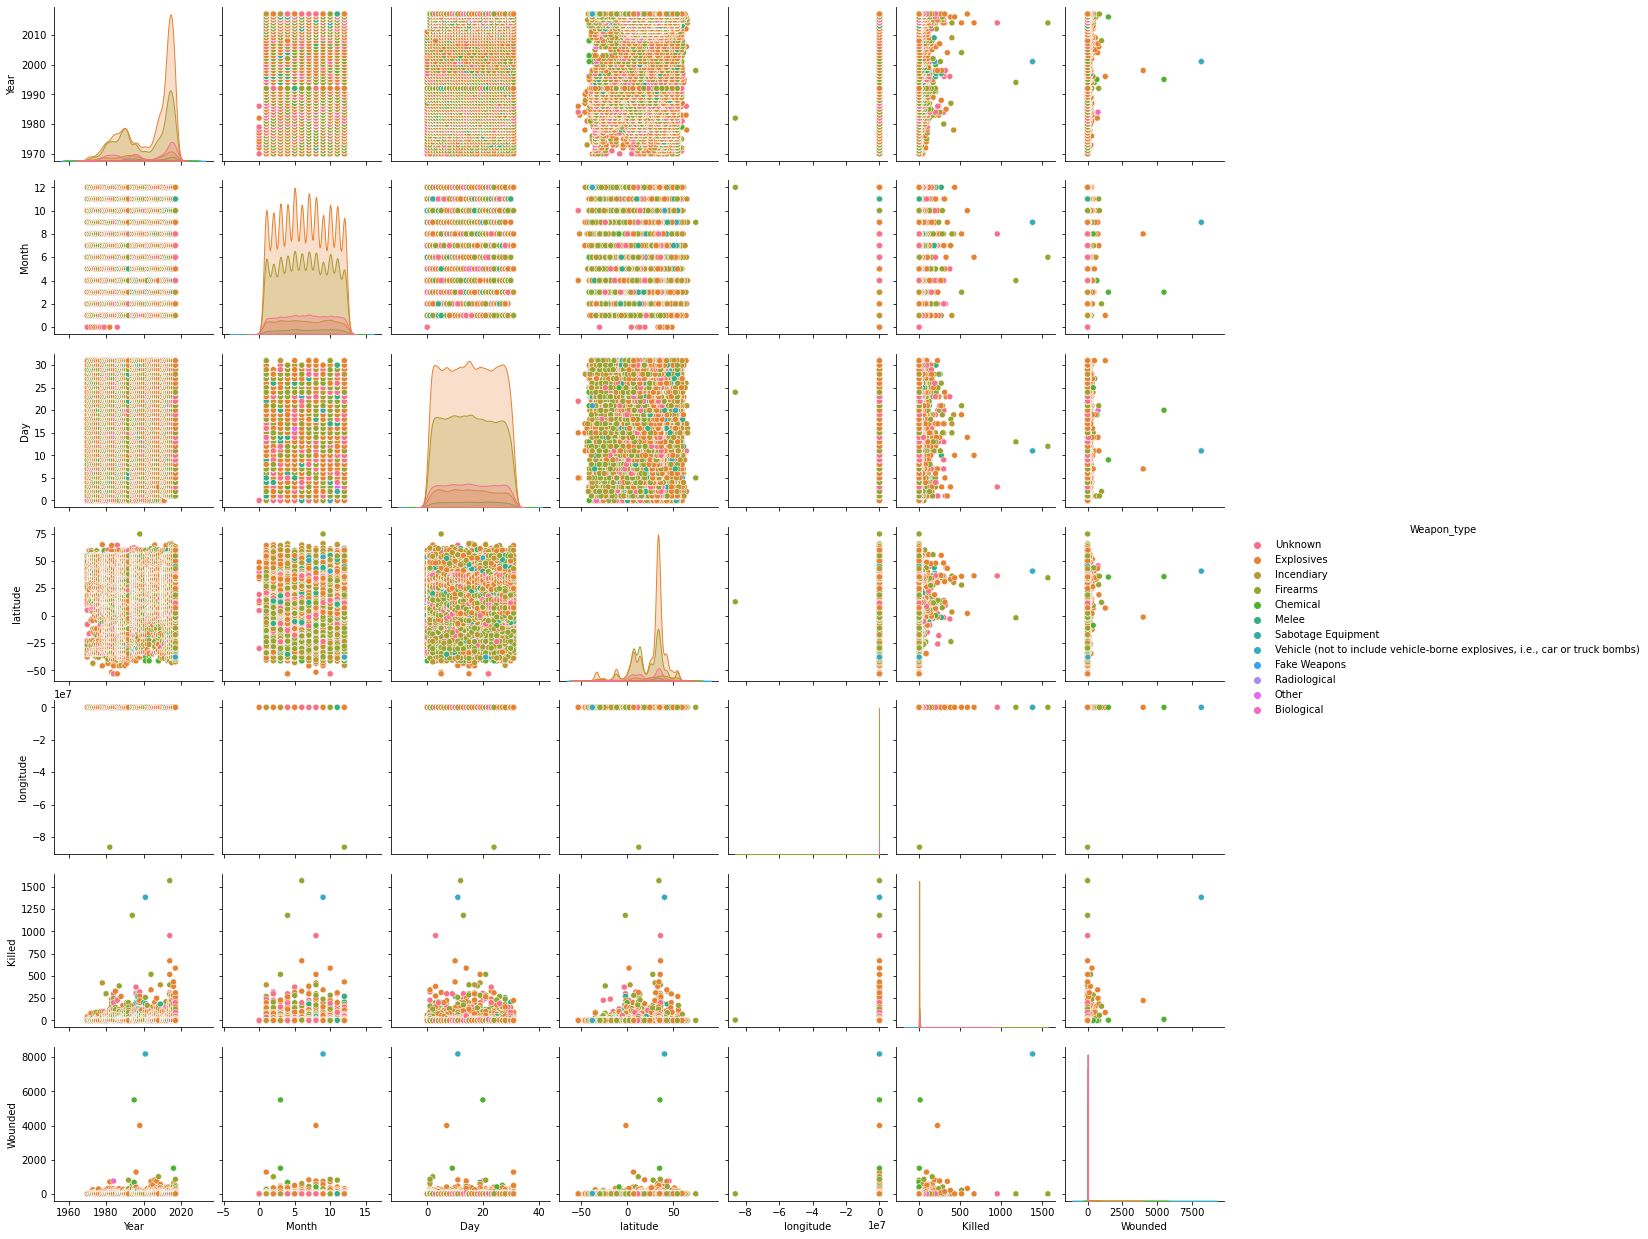

In [33]:
sns.pairplot(df,hue='Weapon_type')

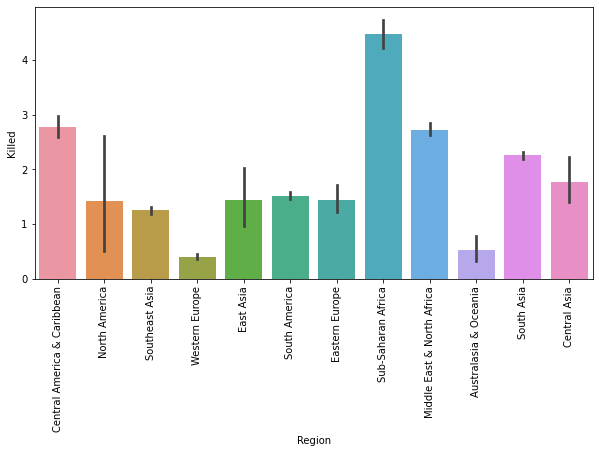

In [34]:
plt.figure(figsize = (10,5))
sns.barplot(x='Region',y='Killed',data=df)
plt.xticks(rotation=90)
plt.ylabel("Killed")
plt.show()

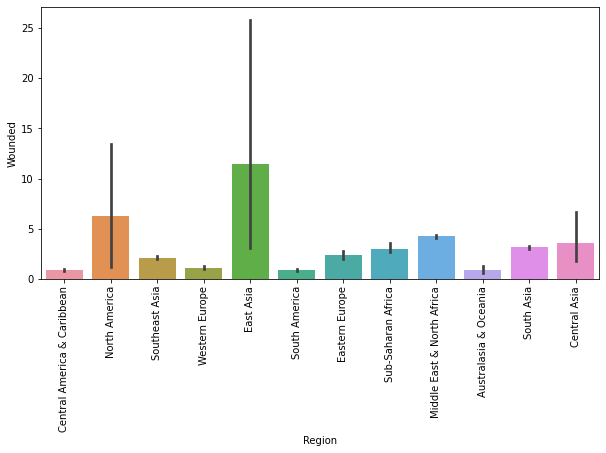

In [35]:
plt.figure(figsize = (10,5))
sns.barplot(x='Region',y='Wounded',data=df)
plt.xticks(rotation=90)
plt.ylabel("Wounded")
plt.show()

C:\Users\DR. DEBASISH SAHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


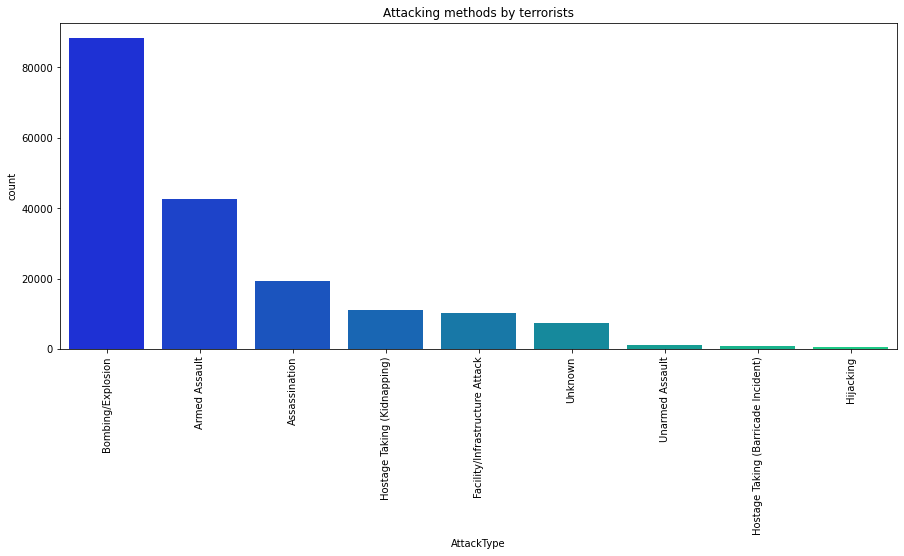

In [36]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=df,palette='winter',order=df['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Attacking methods by terrorists")
plt.show()

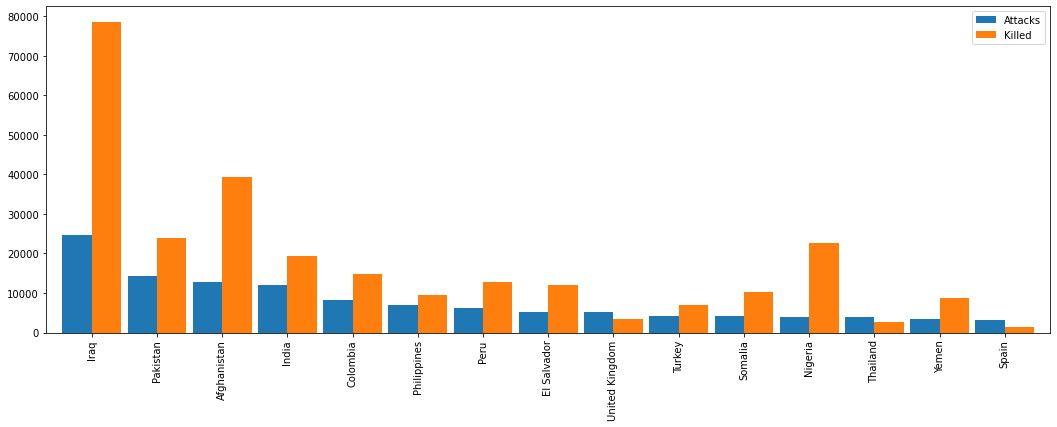

In [37]:
coun_terror=df['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=df.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

C:\Users\DR. DEBASISH SAHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


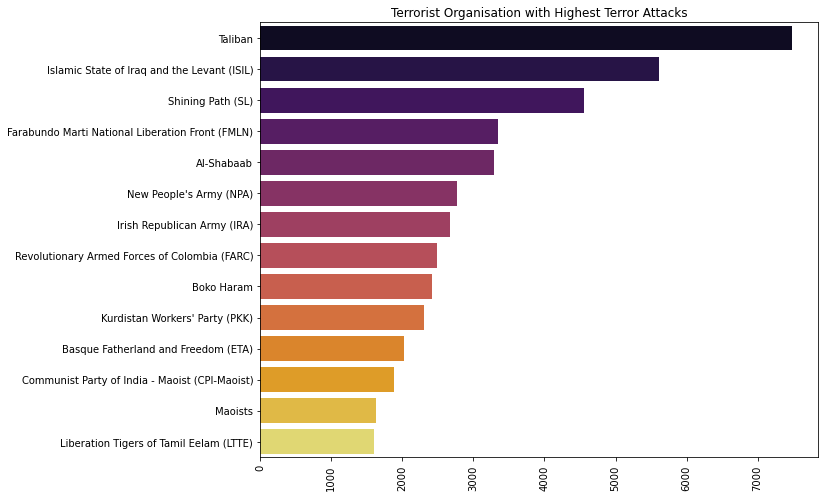

In [38]:
sns.barplot(df['Group'].value_counts()[1:15].values,df['Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Organisation with Highest Terror Attacks')
plt.show()

In [39]:
df.tail(10)

,Year,Month,Day,Country,State,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,TargetType,Weapon_type,Motive
181681,2017,12,31,Philippines,Maguindanao,Southeast Asia,Shariff Aguak,6.862806,124.443649,Bombing/Explosion,1,5,Patrol,12/31/2017: A roadside bomb detonated targetin...,Bangsamoro Islamic Freedom Movement (BIFM),Police,Explosives,NaN
181682,2017,12,31,Italy,Marche,Western Europe,Spinetoli,42.888982,13.772795,Facility/Infrastructure Attack,0,0,Migrant Center,12/31/2017: Assailants set fire to a migrants'...,Unknown,Private Citizens & Property,Incendiary,"The specific motive is unknown; however, sourc..."
181683,2017,12,31,Afghanistan,Faryab,South Asia,Kohistan district,35.315467,64.815508,Armed Assault,6,0,House of Member,12/31/2017: Assailants attacked the house of a...,Taliban,Terrorists/Non-State Militia,Firearms,"The specific motive is unknown; however, sourc..."
181684,2017,12,31,India,Assam,South Asia,Hungrum,25.180162,93.015788,Hostage Taking (Kidnapping),0,0,Personal Security Officer of Council Member Ih...,12/31/2017: Assailants abducted Prafulla Phuka...,Zeliangrong United Front,Government (General),Firearms,NaN
181685,2017,12,31,Afghanistan,Faryab,South Asia,Maymana,35.921051,64.774544,Bombing/Explosion,0,4,Jewelry Shop,12/31/2017: An explosive device detonated at a...,Unknown,Business,Explosives,NaN
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1,2,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2,7,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0,0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN
181689,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0,0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN
181690,2017,12,31,Philippines,Maguindanao,Southeast Asia,Cotabato City,7.209594,124.241966,Bombing/Explosion,0,0,Unknown,12/31/2017: An explosive device was discovered...,Unknown,Unknown,Explosives,NaN


## Conclusions

- Terrorism activities escalated from 2008 and reached the peak at 2014.
- Middle East and North Africa were the top affected regions.
- Iraq faced the toughest and frequent terrorism moves.
- Bombing was the most frequent method used by terrorists.
- Killed rates are higher in Iraq.
- Taliban is mostly responsible for the majority of terrorism activities.

## Solution

- More security surveillance required at Iraq.
- Noticing the trends of terrorism activities, hugely populated regions suffer major kill ratios. This must be controlled with strict border rules.
- Impose strict rules in controlling the explosions produced worldwide by limiting the number of supplies.
- High alert at densly populated locations in each city as it is noticed that terrorists target citizens and private property.

## Thank You